# 금융 데이터 분석 (1)
## 산술평균
산술평균은 가장 흔하게 사용되는 평균의 한 종류로, 주어진 모든 수(데이터)의 값을 더한 후 그 수의 개수로 나눈 값을 의미합니다. 일상생활에서 우리가 보통 '평균'이라고 말할 때 가리키는 것이 바로 이 산술평균입니다. 예를 들어, 시험 점수가 80점, 90점, 100점일 때, 세 과목의 평균 점수는 (80 + 90 + 100) / 3 = 90점이 됩니다.

In [19]:
import FinanceDataReader as fdr
df = fdr.DataReader("005930")
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2013-04-15,30060,30699,30060,30460,215346,NaN
2013-04-16,30100,30640,30020,30560,371037,0.003283
2013-04-17,31320,31320,30280,30360,209822,-0.006545
2013-04-18,30400,30440,29619,29660,267168,-0.023057
2013-04-19,29299,29839,29100,29500,314080,-0.005394


In [40]:
# 연간 수익률 계산 함수 (산술 평균 계산에 필요)
def return_year(x):
    A = x.iloc[0]
    B = x.iloc[-1]
    return (B - A) / A

In [21]:
# 각 연도의 실제 수익률 계산
year_return = df.groupby(df.index.year)['Close'].apply(return_year)
year_return

Date
2013   -0.099146
2014    0.013751
2015   -0.052632
2016    0.495436
2017    0.411634
2018   -0.241474
2019    0.440000
2020    0.467391
2021   -0.056627
2022   -0.296438
2023    0.414414
2024   -0.331658
2025    0.194757
Name: Close, dtype: float64

In [22]:
# 산술 평균 계산
amean_return = year_return.mean()
amean_return

0.10456991329883311

In [23]:
start_price = df.iloc[0]['Close']      # 전체 기간의 시작 가격
end_price = df.iloc[-1]['Close']        # 전체 기간의 최종 가격
start_date = df.index[0]                # 시작 날짜
end_date = df.index[-1]                  # 최종 날짜

In [24]:
# 전체 투자 기간을 '연(year)' 단위로 계산
total_years = (end_date - start_date).days / 365.25          # 4년에 1번있는 윤년 때문
total_years

12.216290212183436

In [25]:
print(f"실제 최종 주가: {end_price:,.0f} 원")

실제 최종 주가: 63,800 원


In [26]:
# 산술 평균 기반 시뮬레이션
simulated_price_amean = start_price * ((1 + amean_return) ** total_years)
print(f"산술 평균 시뮬레이션 최종 주가: {simulated_price_amean:,.0f} 원")

산술 평균 시뮬레이션 최종 주가: 102,657 원


## 기하평균
기하평균은 주어진 n개의 양수 값들을 모두 곱한 후, 그 곱에 n제곱근을 취한 값입니다. 주로 변화율의 평균을 계산할 때 사용되며, 각 데이터가 비율적인 관계를 가질 때 산술평균보다 더 유용한 지표가 됩니다.

예를 들어, 100만 원을 투자했다고 상상해 봅시다. 3년간의 수익률이 다음과 같습니다. 1년 차: +60% 수익 (엄청난 대박이 터졌습니다!), 2년 차: -30% 손실 (시장이 조정받으며 손실을 봤습니다.), 3년 차: -25% 손실 (하락장이 이어지며 추가 손실을 봤습니다.). 산술평균으로는 ```"매년 약 1.67%씩 꾸준히 이익을 본 것"```처럼 계산됩니다. 이 숫자만 보면 3년 후에 원금보다 돈이 조금이라도 늘었을 것이라고 기대하게 됩니다. 하지만 3년 후, 100만 원이 84만 원이 되었습니다. 산술평균의 예측과 정반대로, 실제로는 16만 원의 손실을 기록했습니다. 이처럼 투자 기간이 길어지고 변동성이 클수록, 산술평균은 현실을 심각하게 왜곡할 수 있습니다. 따라서 진정한 연평균 투자 성과를 알려면 반드시 기하평균을 사용해야만 합니다.

In [27]:
(year_return + 1).cumprod()

Date
2013    0.900854
2014    0.913241
2015    0.865176
2016    1.293815
2017    1.826393
2018    1.385367
2019    1.994929
2020    2.927341
2021    2.761576
2022    1.942941
2023    2.748123
2024    1.836685
2025    2.194392
Name: Close, dtype: float64

In [28]:
# 정확한 CAGR 계산
cagr = (end_price / start_price) ** (1 / total_years) - 1
cagr

0.062389624274940214

In [29]:
# 기하 평균(CAGR) 기반 시뮬레이션
simulated_price_cagr = start_price * ((1 + cagr) ** total_years)
print(f"기하 평균 시뮬레이션 최종 주가: {simulated_price_cagr:,.0f} 원")

기하 평균 시뮬레이션 최종 주가: 63,800 원


## 연평균 수익률이 가장 좋은 종목은?

In [12]:
from tqdm import tqdm

kospi = fdr.StockListing("KOSPI")

total = []

for i in tqdm(range(len(kospi))):

    try:
        row = kospi.iloc[i]
        code = row['Code']
        name = row['Name']
        df = fdr.DataReader("NAVER:" + code).copy()
    
        start_price = df.iloc[0]['Close']
        end_price = df.iloc[-1]['Close']
        start_date = df.index[0]
        end_date = df.index[-1]
    
        total_years = (end_date - start_date).days / 365.25

        cagr = ((end_price / start_price) ** (1 / total_years) - 1) * 100
        total.append([code, name, cagr, total_years])
    
    except:
        continue

100%|████████████████████████████████████████████████████████████████████████████████| 962/962 [01:44<00:00,  9.19it/s]


In [13]:
import pandas as pd
result = pd.DataFrame(total, columns = ['코드번호', '종목', '연평균 수익률', '기간']).sort_values("연평균 수익률", ascending = False)
result[result['기간'] >= 12]

,코드번호,종목,연평균 수익률,기간
55,003230,삼양식품,38.263625,12.221766
56,042700,한미반도체,37.381886,12.221766
26,138040,메리츠금융지주,31.884240,12.221766
459,003350,한국화장품제조,24.938072,12.221766
712,019175,신풍제약우,24.567623,12.221766
...,...,...,...,...
730,001470,삼부토건,-28.516868,12.221766
290,016380,KG스틸,-30.593428,12.221766
661,011810,STX,-31.743243,12.221766
866,090370,메타랩스,-32.700706,12.221766


## 연습문제
1. 초기 투자금이 100만원일 때, 3년간 연 수익률이 각각 +50%, -50%, +20% 였다고 가정해봅시다.
    * 3년간의 산술평균 수익률을 계산하세요.
    * 3년 후의 최종 자산을 계산하고, 이를 바탕으로 실제 ```연평균 복리 수익률(CAGR, 기하평균)```을 계산하세요.

- 3년간의 산술평균 수익률을 계산하세요.

In [14]:
money = 1000000
box = [0.5, -0.5, 0.2]

# 산술평균
rate = sum(box) / len(box)

for i in box:
    money *= (1 + rate)

money

1213629.6296296297

- 3년 후의 최종 자산을 계산하고, 이를 바탕으로 실제 연평균 복리 수익률(CAGR, 기하평균)을 계산하세요.

In [15]:
money = 1000000

# 기하평균
A = 1
for i in box:
    A *= (i + 1)

A ** (1/3) - 1

-0.03451061539437028

2. SK하이닉스(종목코드: 000660)의 전체 상장 기간 데이터를 사용하여 다음을 계산하고 설명하세요.
    * 연도별 수익률을 구하고, 이들의 산술평균을 계산하세요.
    * 전체 기간의 시작가와 최종가를 이용해 ```연평균 복리 수익률(CAGR)```을 계산하세요.
    * 산술평균과 CAGR로 각각 시뮬레이션한 최종 주가와 실제 최종 주가를 비교하세요.

- 연도별 수익률을 구하고, 이들의 산술평균을 계산하세요.

In [37]:
import FinanceDataReader as fdr
df = fdr.DataReader("000660")

start_date = df.index[0]
end_date = df.index[-1]
total_years = (end_date - start_date).days / 365.25

start_price = df.iloc[0]["Close"]
end_price = df.iloc[-1]["Close"]

A = df.groupby(df.index.year)["Close"].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0])
A.mean()

0.2566884234991776

- 전체 기간의 시작가와 최종가를 이용해 연평균 복리 수익률(CAGR)을 계산하세요.

In [38]:
(end_price / start_price) ** (1 / total_years) - 1

0.20291802069554898

- 산술평균과 CAGR로 각각 시뮬레이션한 최종 주가와 실제 최종 주가를 비교하세요.

In [42]:
# 산술 평균 기반 시뮬레이션
def return_year(x):
    A = x.iloc[0]
    B = x.iloc[-1]
    return (B - A) / A
year_return = df.groupby(df.index.year)['Close'].apply(return_year)
amean_return = year_return.mean()
simulated_price_amean = start_price * ((1 + amean_return) ** total_years)
print(f"산술 평균 시뮬레이션 최종 주가: {simulated_price_amean:,.0f} 원")

# 기하 평균(CAGR) 기반 시뮬레이션
cagr = (end_price / start_price) ** (1 / total_years) - 1
simulated_price_cagr = start_price * ((1 + cagr) ** total_years)
print(f"기하 평균 시뮬레이션 최종 주가: {simulated_price_cagr:,.0f} 원")

print(f"실제 최종 주가: {end_price:,.0f} 원")

산술 평균 시뮬레이션 최종 주가: 475,151 원
기하 평균 시뮬레이션 최종 주가: 278,500 원
실제 최종 주가: 278,500 원


3. 네이버(NAVER, 종목코드: 035420)의 최근 5년간 (오늘을 기준으로) 데이터를 사용하여 연평균 복리 수익률(CAGR)을 계산하세요.

In [43]:
import FinanceDataReader as fdr
from datetime import datetime, timedelta

end_date = datetime.today()
start_date = end_date - timedelta(days=365.25 * 5)

start_str = start_date.strftime('%Y-%m-%d')
end_str = end_date.strftime('%Y-%m-%d')

df = fdr.DataReader('035420', start=start_str, end=end_str)
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-07-03,276500,280500,274500,277500,971940,0.001805
2020-07-06,278000,287500,278000,281500,1211636,0.014414
2020-07-07,285000,289500,279000,279500,1365047,-0.007105
2020-07-08,280000,284500,274000,282500,1353345,0.010733
2020-07-09,286500,296500,284500,287500,2006662,0.017699
...,...,...,...,...,...,...
2025-06-27,263500,265000,252000,257500,2316733,-0.013410
2025-06-30,257000,268000,255500,262500,2219752,0.019417
2025-07-01,264000,269000,260000,262000,1791173,-0.001905


In [45]:
start_price = df.iloc[0]["Close"]
end_price = df.iloc[-1]["Close"]

cagr = (end_price / start_price) ** (1 / total_years) - 1
cagr

-0.007537693001550716

4. 카카오(035720)와 삼성SDI(006400)의 2015년 1월 1일부터 현재까지의 데이터를 각각 불러와 CAGR을 계산하고, 어느 종목의 연평균 수익률이 더 높았는지 비교하세요.

In [50]:
import FinanceDataReader as fdr
from datetime import datetime

start_date = datetime.strptime("2015-01-01", "%Y-%m-%d")
end_date = datetime.today()
total_years = (end_date - start_date).days / 365.25

start_str = start_date.strftime('%Y-%m-%d')
end_str = end_date.strftime('%Y-%m-%d')

kakao = fdr.DataReader("035720", start=start_str, end=end_str)
sdi = fdr.DataReader("006400", start=start_str, end=end_str)

In [51]:
start_price = kakao.iloc[0]["Close"]
end_price = kakao.iloc[-1]["Close"]

cagr_kakao = (end_price / start_price) ** (1 / total_years) - 1
cagr_kakao

0.07611312564009332

In [52]:
start_price = sdi.iloc[0]["Close"]
end_price = sdi.iloc[-1]["Close"]

cagr_sdi = (end_price / start_price) ** (1 / total_years) - 1
cagr_sdi

0.04686401274061991

5. 강의 내용에서는 코스피(KOSPI) 시장을 분석했습니다. 이번에는 코스닥(KOSDAQ) 시장에 상장된 종목 중, 상장 기간이 10년 이상인 종목들을 대상으로 연평균 복리 수익률(CAGR)이 가장 높은 상위 5개 종목을 찾아보세요.

------

## 네이버 증권 크롤링

In [46]:
import undetected_chromedriver as uc
from bs4 import BeautifulSoup
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

driver = uc.Chrome()
driver.get("https://finance.naver.com/item/sise_day.naver?code=005930&page=1")

html = BeautifulSoup(driver.page_source)
html.find("table")
pd.read_html(str(html.find("table")))[0].dropna()

,날짜,종가,전일비,시가,고가,저가,거래량
1,2025.06.27,60900.0,상승 700,60100.0,61600.0,60000.0,12706607.0
2,2025.06.26,60200.0,"하락 1,100",61300.0,61300.0,59900.0,19402300.0
3,2025.06.25,61300.0,상승 800,61500.0,61600.0,60300.0,23933612.0
4,2025.06.24,60500.0,"상승 2,500",59400.0,60600.0,59300.0,23737899.0
5,2025.06.23,58000.0,"하락 1,500",58400.0,58500.0,57600.0,16551694.0
9,2025.06.20,59500.0,상승 300,59400.0,59800.0,59100.0,18072251.0
10,2025.06.19,59200.0,하락 600,60500.0,60600.0,59000.0,16876278.0
11,2025.06.18,59800.0,"상승 1,700",58000.0,59800.0,57900.0,17620705.0
12,2025.06.17,58100.0,상승 900,57800.0,59800.0,57400.0,28637003.0
13,2025.06.16,57200.0,"하락 1,100",58000.0,58100.0,56900.0,22200872.0


In [47]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

total = []
for n in range(1, 728):
    driver.implicitly_wait(10)
    driver.get(f"https://finance.naver.com/item/sise_day.naver?code=005930&page={n}")
    html = BeautifulSoup(driver.page_source)
    table = pd.read_html(str(html.find("table")))[0].dropna()
    total.append(table)

In [50]:
pd.concat(total, ignore_index=True)      
# 크롤링 완

,날짜,종가,전일비,시가,고가,저가,거래량
0,2025.06.27,60900.0,상승 700,60100.0,61600.0,60000.0,12706607.0
1,2025.06.26,60200.0,"하락 1,100",61300.0,61300.0,59900.0,19402300.0
2,2025.06.25,61300.0,상승 800,61500.0,61600.0,60300.0,23933612.0
3,2025.06.24,60500.0,"상승 2,500",59400.0,60600.0,59300.0,23737899.0
4,2025.06.23,58000.0,"하락 1,500",58400.0,58500.0,57600.0,16551694.0
...,...,...,...,...,...,...,...
7257,1996.06.29,68500.0,상승 400,68100.0,69100.0,67100.0,96710.0
7258,1996.06.28,68100.0,"상승 1,200",67300.0,68500.0,67200.0,138430.0
7259,1996.06.27,66900.0,하락 800,67500.0,67700.0,66700.0,155450.0
7260,1996.06.26,67700.0,상승 200,67600.0,67900.0,66000.0,136630.0


----

In [53]:
df = pd.read_excel("Data/Samsung.xlsx")
df["날짜"] = pd.to_datetime(df["날짜"])
df.set_index("날짜", inplace=True)
del df["전일비"]
df.sort_index(inplace = True)
df

,종가,시가,고가,저가,거래량
날짜,,,,,
1996-06-25,67500,66500,68300,65600,112960
1996-06-26,67700,67600,67900,66000,136630
1996-06-27,66900,67500,67700,66700,155450
1996-06-28,68100,67300,68500,67200,138430
1996-06-29,68500,68100,69100,67100,96710
...,...,...,...,...,...
2025-06-23,58000,58400,58500,57600,16551694
2025-06-24,60500,59400,60600,59300,23737899
2025-06-25,61300,61500,61600,60300,23933612


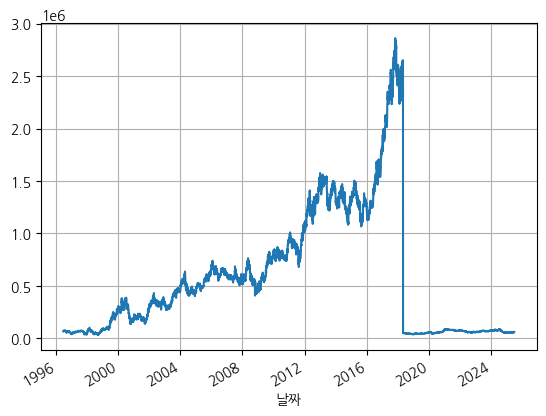

In [55]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

df["종가"].plot()
plt.grid()
plt.show()
# 폭락같아보이지만 액면분할

In [62]:
train = df[df.index.year < 2024]
test = df[df.index.year >= 2024]    # 어느 시점을 기점으로 train,test 나눔

# train 데이터의 시험지, 정답지
train_x = []
train_y = []
for i in range(len(train) - 1):
    A = train.iloc[i].values
    B = train.iloc[i+1]["종가"]
    train_x.append(A)
    train_y.append(B)

# test 데이터의 시험지, 정답지
test_x = []
test_y = []
for i in range(len(test) - 1):
    A = test.iloc[i].values
    B = test.iloc[i+1]["종가"]
    test_x.append(A)
    test_y.append(B)

In [63]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(train_x, train_y)
model.score(test_x, test_y)

0.9832919316002243

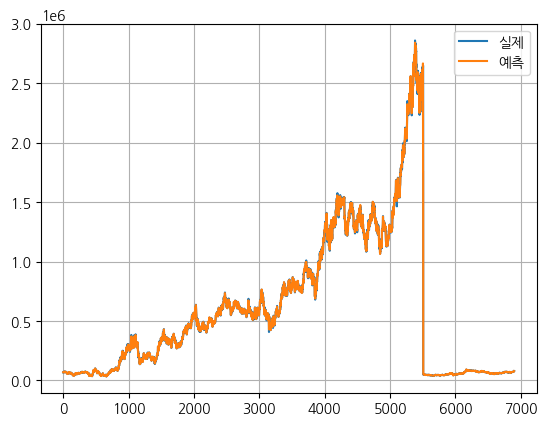

In [66]:
pred = model.predict(train_x)

plt.plot(train["종가"].values)
plt.plot(pred)
plt.legend(["실제", "예측"])
plt.grid()
plt.show()

# 두 그래프가 겹쳐서나온다 = 모델이 훈련데이터를 잘 학습했다는 뜻

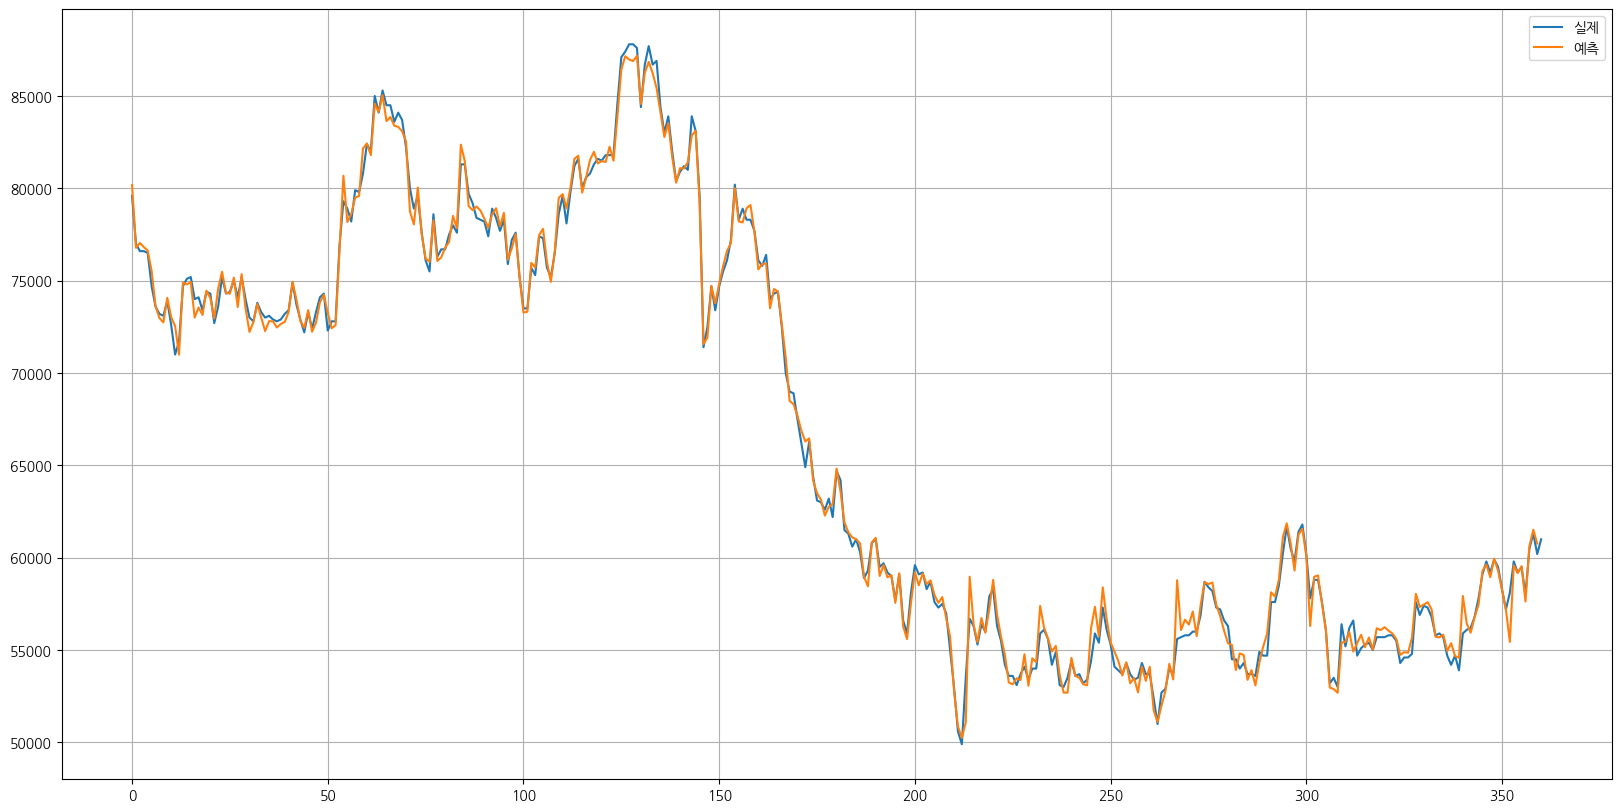

In [71]:
pred = model.predict(test_x)

plt.figure(figsize = (20, 10))
plt.plot(test["종가"].values)
plt.plot(pred)
plt.legend(["실제", "예측"])
plt.grid()
plt.show()

In [73]:
A = df.iloc[-1].values
model.predict([A])

array([60852.])

In [95]:
(fdr.DataReader("005930")['Change'] * 100).mean()

0.03629849598733139

# 머신러닝으로 주식데이터 예측해서 써먹으려면 회귀보단 분류로 해야함

In [78]:
train_x = []
train_y = []
for i in range(len(train) - 1):
    A = train.iloc[i].values
    B = train.iloc[i]["종가"] * 1.03 <= train.iloc[i+1]["종가"]   # 다음날 종가가 3%이상 올라갔다면 true
    train_x.append(A)
    train_y.append(B)

test_x = []
test_y = []
for i in range(len(test) - 1):
    A = test.iloc[i].values
    B = test.iloc[i]["종가"] * 1.03 <= test.iloc[i+1]["종가"]   # 다음날 종가가 3%이상 올라갔다면 true
    test_x.append(A)
    test_y.append(B)

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(train_x, train_y)

pred = model.predict(test_x)

report = classification_report(test_y, pred)
print(report)

# true에 대한 정확도 0% -> 모델 수정필요

              precision    recall  f1-score   support

       False       0.93      1.00      0.96       335
        True       0.00      0.00      0.00        25

    accuracy                           0.93       360
   macro avg       0.47      0.50      0.48       360
weighted avg       0.87      0.93      0.90       360



In [89]:
# 10일치 묶기
window = 10

train_x = []
train_y = []
for i in range(len(train) - window):
    A = train.iloc[i : i + window].values.flatten()
    B = train.iloc[i + window - 1]['종가'] * 1.03 <= train.iloc[i + window]['종가']
    train_x.append(A)
    train_y.append(B)

test_x = []
test_y = []
for i in range(len(test) - window):
    A = test.iloc[i : i + window].values.flatten()
    B = test.iloc[i + window - 1]['종가'] * 1.03 <= test.iloc[i + window]['종가']
    test_x.append(A)
    test_y.append(B)

In [94]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(train_x, train_y)

pred = model.predict(test_x)

report = classification_report(test_y, pred)
print(report)

# 여전히 0% 나오지만, 내부의 여러 문제점은 고쳐진 상태

              precision    recall  f1-score   support

       False       0.93      1.00      0.96       326
        True       0.00      0.00      0.00        25

    accuracy                           0.93       351
   macro avg       0.46      0.50      0.48       351
weighted avg       0.86      0.93      0.89       351

